In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = yf.download('AAPL', start='2000-01-01', end='2024-9-30')
print(df)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2000-01-03 00:00:00+00:00    0.843076    0.999442    1.004464    0.907924   
2000-01-04 00:00:00+00:00    0.771997    0.915179    0.987723    0.903460   
2000-01-05 00:00:00+00:00    0.783293    0.928571    0.987165    0.919643   
2000-01-06 00:00:00+00:00    0.715509    0.848214    0.955357    0.848214   
2000-01-07 00:00:00+00:00    0.749401    0.888393    0.901786    0.852679   
...                               ...         ...         ...         ...   
2024-09-23 00:00:00+00:00  226.221115  226.470001  229.449997  225.809998   
2024-09-24 00:00:00+00:00  227.120117  227.369995  229.350006  225.729996   
2024-09-25 00:00:00+00:00  226.121216  226.369995  227.289993  224.020004   
2024-09-26 00:00:00+00:00  227.269958  227.520004  228.500000  225.410004   

In [30]:
df.head(3)
print('Data Column:\n', df.columns, '\n')
print('Data Types:\n', df.dtypes, '\n')
print('Shape:\n', df.shape, '\n')
print('Description of the Data:\n',df.describe(), '\n')
print('Data Info:\n', df.info(), '\n')
print('Data Sample:\n', df.sample(5), '\n')
print('Data Shape:\n', df.shape, '\n')
print('Data Size:\n', df.size, '\n')
print('Data Memory Usage:\n', df.memory_usage(deep=True), '\n')


Data Column:
 MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker']) 

Data Types:
 Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object 

Shape:
 (6224, 6) 

Description of the Data:
 Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   6224.000000  6224.000000  6224.000000  6224.000000  6224.000000   
mean      39.264394    40.712310    41.121722    40.267099    40.685403   
std       57.150798    57.458253    58.024703    56.836732    57.409872   
min        0.197631     0.234286     0.235536     0.227143     0.231964   
25%        1.97103

In [31]:
print('Number of Empty data:\n',df.isnull().sum(), "\n")
print('Number of duplicated data:\n',df.duplicated().sum(), "\n")

Number of Empty data:
 Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64 

Number of duplicated data:
 0 



Text(0.5, 1.0, 'Correlation Matrix of AAPL Stock Data')

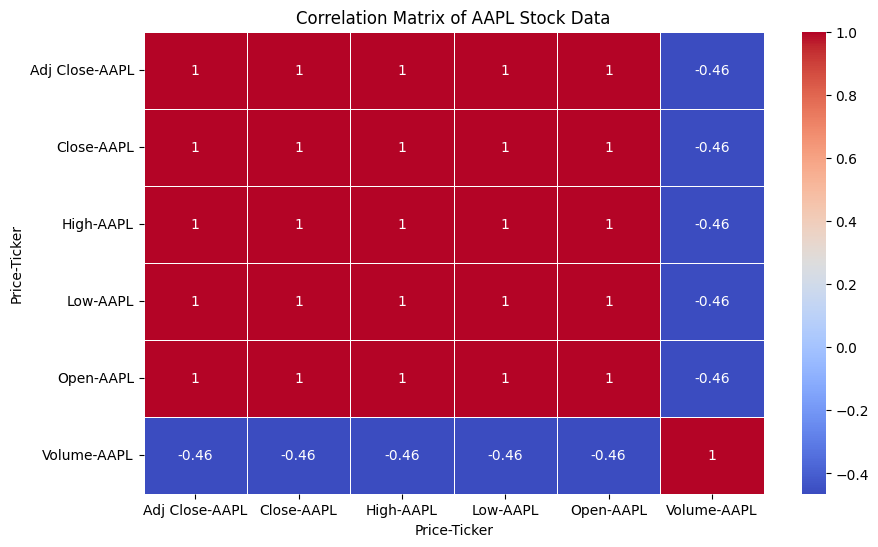

In [32]:
corr = df.corr()   
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of AAPL Stock Data')

<Axes: title={'center': 'APPL Adj Close Price'}, xlabel='Date'>

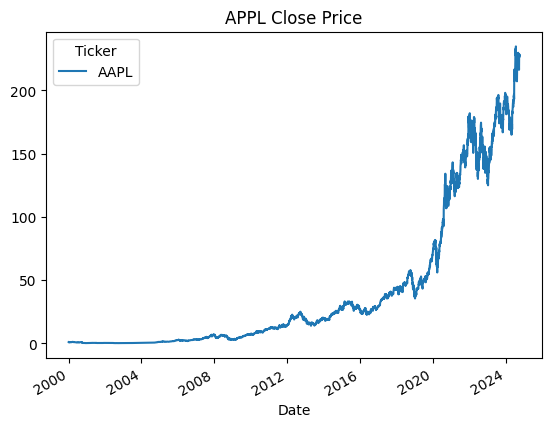

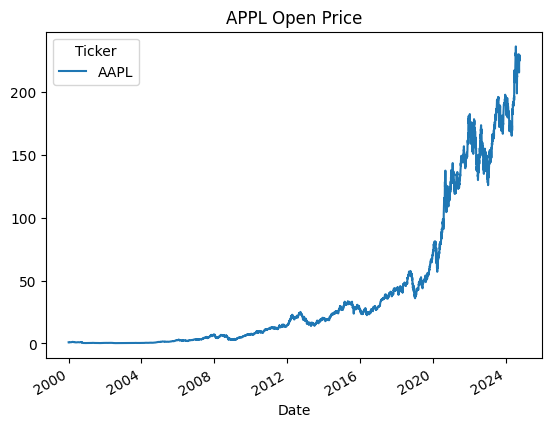

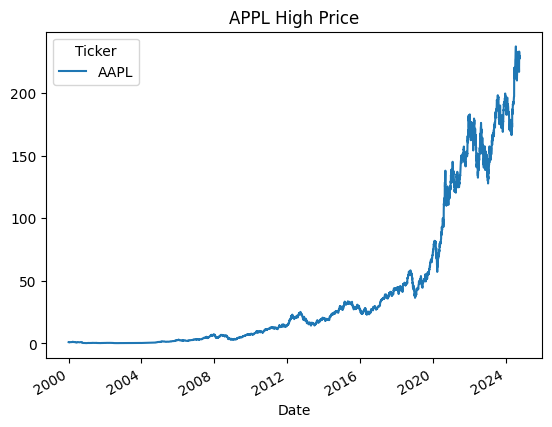

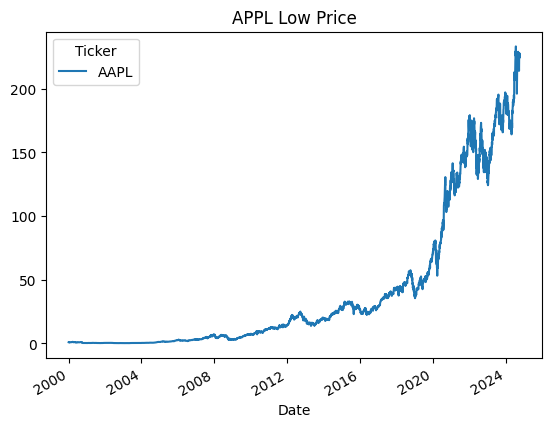

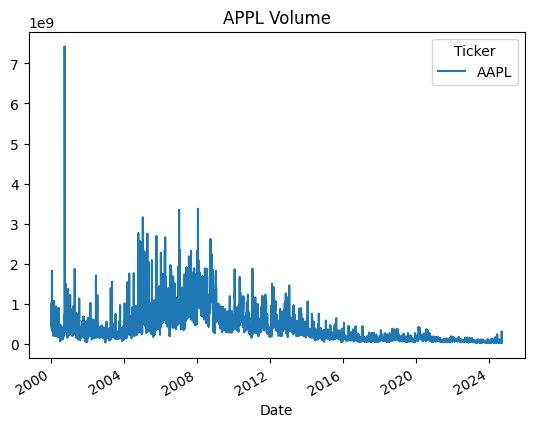

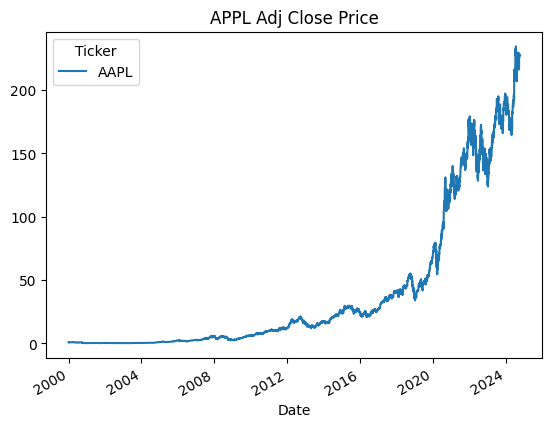

In [33]:
df.plot.line( y='Close', use_index=True, title='APPL Close Price')
df.plot.line( y='Open', use_index=True, title='APPL Open Price')
df.plot.line( y='High', use_index=True, title='APPL High Price')
df.plot.line( y='Low', use_index=True, title='APPL Low Price')
df.plot.line( y='Volume', use_index=True, title='APPL Volume')
df.plot.line( y='Adj Close', use_index=True, title='APPL Adj Close Price')



<Axes: >

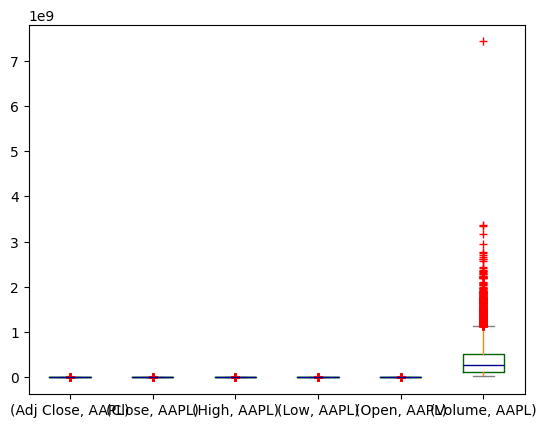

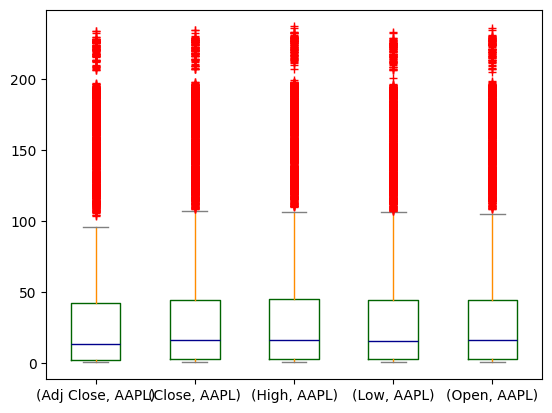

In [34]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
df.plot.box(color=color, sym="r+")

df_without_volume = df.drop(columns=['Volume'])
df_without_volume.plot.box(color=color, sym="r+")

In [35]:
df.astype(float)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03 00:00:00+00:00,0.843076,0.999442,1.004464,0.907924,0.936384,535796800.0
2000-01-04 00:00:00+00:00,0.771997,0.915179,0.987723,0.903460,0.966518,512377600.0
2000-01-05 00:00:00+00:00,0.783293,0.928571,0.987165,0.919643,0.926339,778321600.0
2000-01-06 00:00:00+00:00,0.715509,0.848214,0.955357,0.848214,0.947545,767972800.0
2000-01-07 00:00:00+00:00,0.749401,0.888393,0.901786,0.852679,0.861607,460734400.0
...,...,...,...,...,...,...
2024-09-23 00:00:00+00:00,226.221115,226.470001,229.449997,225.809998,227.339996,54146000.0
2024-09-24 00:00:00+00:00,227.120117,227.369995,229.350006,225.729996,228.649994,43556100.0


[*********************100%***********************]  1 of 1 completed


Training sample matrix (x_train):
 [[0.53005976 0.52889636 0.52905226 0.0464299 ]
 [0.08187282 0.08415969 0.08284611 0.18227278]
 [0.2795428  0.2835291  0.28238878 0.05652235]
 ...
 [0.24841147 0.2513954  0.25048903 0.05853504]
 [0.38951764 0.38488556 0.39477748 0.13805061]
 [0.13681458 0.13802079 0.13724417 0.13355212]]
Testing sample matrix (x_test):
 [[0.20276187 0.20529955 0.2052973  0.16350696]
 [0.16728525 0.1629556  0.17005424 0.38012999]
 [0.15745063 0.15690021 0.15501742 0.16803443]
 ...
 [0.10143465 0.1035891  0.103009   0.1035561 ]
 [0.29962027 0.30113975 0.30385755 0.03343347]
 [0.39135991 0.39365277 0.39090853 0.05844962]]
Training target values (y_train):
 [[0.51962399]
 [0.07192755]
 [0.25669522]
 ...
 [0.22708105]
 [0.35188047]
 [0.12100181]]
Testing target values (y_test):
 [[0.17484508]
 [0.14584993]
 [0.14268526]
 [0.15960278]
 [0.4758242 ]
 [0.22293059]
 [0.34767671]
 [0.03029884]
 [0.35852693]
 [0.06466613]
 [0.18317143]
 [0.64729521]
 [0.08681893]
 [0.19155179]
 [

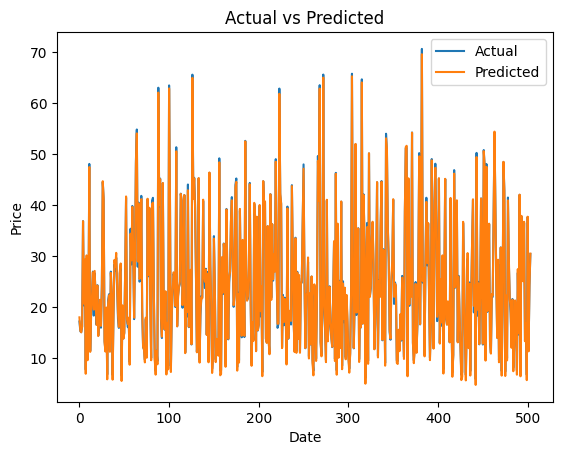

Mean Square Error: 6.848243201064325e-05
Mean Absolute Error: 0.006455314609516803
R2-Score: 0.9983206554550296
Explained Variance Score: 0.9983261948885214
Accuracy:  0.9983206554550296


In [44]:
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def BackTest(test_data, pred_data):
    plt.plot(test_data, label='Actual')
    plt.plot(pred_data, label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_Score = r2_score(y_test, y_pred)
    Variance = explained_variance_score(y_test, y_pred)

    print("Mean Square Error:", MSE)
    print("Mean Absolute Error:", MAE)
    print("R2-Score:", R2_Score)
    print("Explained Variance Score:", Variance)

#get data from yahoo finance
df = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
df.astype(float) #turn all data into float type

x = df.drop(["Adj Close", "Close"], axis=1) #
y = df["Adj Close"].values.reshape(-1, 1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_transformed = x_scaler.fit_transform(x)
y_transformed = y_scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_transformed, test_size=0.2, random_state=42)

print("Training sample matrix (x_train):\n", x_train)
print("Testing sample matrix (x_test):\n", x_test)
print("Training target values (y_train):\n", y_train)
print("Testing target values (y_test):\n", y_test)

linear_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
history = linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)

y_test_original = y_scaler.inverse_transform(y_test) 
y_pred_original = y_scaler.inverse_transform(y_pred)

BackTest(y_test_original, y_pred_original)
print('Accuracy: ', history.score(x_test, y_test))
